<a href="https://colab.research.google.com/github/meysamsadeghi/Security-and-Robustness-of-Deep-Learning-in-Wireless-Communication-Systems/blob/master/Adv_Attack_Modulation_Classification/CreateModelAndTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 45kB/s 
     |████████████████████████████████| 3.8MB 38.0MB/s 
     |████████████████████████████████| 450kB 37.9MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [1]:
import pickle

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


tf.__version__

'2.0.0'

In [0]:
# It is GNU radio generated datset which accounts for practical aspect of wieless channels such as ...
# It 220,000 samples. Each sample is 2*128 matrix containing the IQ (2) of a received signal sampled 128 times.
# It contains sample points for 11 diifferent modulation schemes (BPSK,QAM,8PSK,...) at 20 different SNR levels, which adds up to 220 tuples of ('modulation',SNR) where for each tuple we have 1000 samples of dimenssion 2*128.

def to_onehot(yin):
    yy = list(yin) # This is a workaround as the map output for python3 is not a list
    yy1 = np.zeros([len(list(yy)), max(yy)+1])
    yy1[np.arange(len(list(yy))),yy] = 1
    return yy1
    

def ModCls_loaddata(path_to_dataset):
    # There is a Pickle incompatibility of numpy arrays between Python 2 and 3
    # which generates ascii encoding error, to work around that we use the following instead of
    # Xd = cPickle.load(open("RML2016.10a_dict.dat",'rb'))
    with open(path_to_dataset, 'rb') as open_file:
        u = pickle._Unpickler( open_file )
        u.encoding = 'latin1'
        Xd = u.load()
    
    snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
    X = []  
    lbl = []
    for mod in mods:
        for snr in snrs:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
    X = np.vstack(X)
    
    # Partition the data
    #  into training and test sets of the form we can train/test on 
    #  while keeping SNR and Mod labels handy for each
    np.random.seed(2016)
    n_examples = X.shape[0]
    n_train = int(n_examples * 0.5)
    train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
    test_idx = list(set(range(0,n_examples))-set(train_idx))
    X_train = X[train_idx]
    X_test =  X[test_idx]
    
    Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
    Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))
    
    in_shp = list(X_train.shape[1:])
    classes = mods
    return X,lbl,X_train,X_test,classes,snrs,mods,Y_train,Y_test,train_idx,test_idx

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [9]:
!ls 'My Drive/Colab Notebooks'

 Adv_Attack_Mod_Classification.ipynb
 adv_fgsm_mnist.ipynb
 checking_GPU_memory.ipynb
 Leonoid_Afremov_Couple_under_one_umbrella.jpg
 picasso_girl_before_a_mirror.jpg
 RML2016.10a_dict.pkl
'Veoneer Innovation with Neural style transfer'
 Veoneer_listed_NY_stock.jpg
 VNE_Leonoid_Afremov_Couple_under_one_umbrella.png
 VNE_picasso_girl_before_a_mirror.png


In [10]:
X,lbl,X_train,X_test,classes,snrs,mods,Y_train,Y_test,train_idx,test_idx = ModCls_loaddata(
    'My Drive/Colab Notebooks/RML2016.10a_dict.pkl')

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print(X.shape)
print(len(lbl))



print('Y_train[4:9]: \n', Y_train[4:9])
print('train_idx.shape:', train_idx.shape)
print('train_idx[4:9]:', train_idx[4:9])
print(lbl[train_idx[4]], lbl[train_idx[5]], lbl[train_idx[6]], lbl[train_idx[7]], lbl[train_idx[8]], lbl[train_idx[9]])

print('classes:', classes)

X_train.shape: (110000, 2, 128)
Y_train.shape: (110000, 11)
(220000, 2, 128)
220000
Y_train[4:9]: 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
train_idx.shape: (110000,)
train_idx[4:9]: [184829 192624 169402 179790 145554]
('QPSK', -12) ('QPSK', 4) ('QAM64', -2) ('QAM64', 18) ('QAM16', -10) ('BPSK', -2)
classes: ['8PSK', 'AM-DSB', 'AM-SSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']



So the lbl contains the modulation and the snr level, and the data points with the same `Y_train` one-hot encoding are of the same modulation (but can be different SNR Levels).


In [11]:
# The CNN Network
list(X_train.shape[1:])

in_shp = list(X_train.shape[1:])
dr = 0.5 # dropout rate (%)
#==============================================================================
# Build VT-CNN2 Neural Net model using Keras
#  - Reshape [N,2,128] to [N,1,2,128] on input
#  - Pass through 2 2DConv/ReLu layers
#  - Pass through 2 Dense layers (ReLu and Softmax)
#  - Perform categorical cross entropy optimization

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape([1]+in_shp, input_shape=in_shp))
model.add(tf.keras.layers.ZeroPadding2D((0,2),data_format='channels_first'))
model.add(tf.keras.layers.Convolution2D(256,(1,3), padding='valid', activation="relu", name="conv1",data_format='channels_first', kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.Dropout(dr))
model.add(tf.keras.layers.ZeroPadding2D((0,2),data_format='channels_first'))
model.add(tf.keras.layers.Convolution2D(80,(2,3), padding="valid", activation="relu", name="conv2", data_format='channels_first', kernel_initializer='glorot_uniform'))
model.add(tf.keras.layers.Dropout(dr))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(tf.keras.layers.Dropout(dr))
model.add(tf.keras.layers.Dense(len(classes), kernel_initializer='he_normal', name="dense2" ))
model.add(tf.keras.layers.Activation('softmax'))
model.add(tf.keras.layers.Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1, 2, 128)         0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 1, 2, 132)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 2, 130)       1024      
_________________________________________________________________
dropout (Dropout)            (None, 256, 2, 130)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 256, 2, 134)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 80, 1, 132)        122960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 1, 132)        0

In [13]:
#==============================================================================
# Set up some params 
nb_epoch = 100     # number of epochs to train on
batch_size = 1024  # training batch size
filepath = 'My Drive/Colab Notebooks/model.h5'
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
]
# perform training ...
history = model.fit(X_train,
    Y_train,
    batch_size=batch_size,
    epochs=nb_epoch,
    verbose=2,
    validation_data=(X_test, Y_test),
    callbacks = callbacks)

Train on 110000 samples, validate on 110000 samples
Epoch 1/100
110000/110000 - 7s - loss: 2.0462 - val_loss: 1.9100
Epoch 2/100
110000/110000 - 7s - loss: 1.8951 - val_loss: 1.7813
Epoch 3/100
110000/110000 - 7s - loss: 1.7828 - val_loss: 1.6574
Epoch 4/100
110000/110000 - 7s - loss: 1.6766 - val_loss: 1.5577
Epoch 5/100
110000/110000 - 7s - loss: 1.6093 - val_loss: 1.5327
Epoch 6/100
110000/110000 - 7s - loss: 1.5704 - val_loss: 1.4708
Epoch 7/100
110000/110000 - 7s - loss: 1.5388 - val_loss: 1.4526
Epoch 8/100
110000/110000 - 7s - loss: 1.5029 - val_loss: 1.3930
Epoch 9/100
110000/110000 - 7s - loss: 1.4795 - val_loss: 1.3851
Epoch 10/100
110000/110000 - 7s - loss: 1.4598 - val_loss: 1.3783
Epoch 11/100
110000/110000 - 7s - loss: 1.4413 - val_loss: 1.3395
Epoch 12/100
110000/110000 - 7s - loss: 1.4304 - val_loss: 1.3356
Epoch 13/100
110000/110000 - 7s - loss: 1.4163 - val_loss: 1.3474
Epoch 14/100
110000/110000 - 8s - loss: 1.4132 - val_loss: 1.3274
Epoch 15/100
110000/110000 - 7s -

In [0]:
evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

In [15]:

# Show simple version of performance
score = model.evaluate(X_test, Y_test, verbose=1, batch_size=batch_size)
print(score)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1.2857079607530073


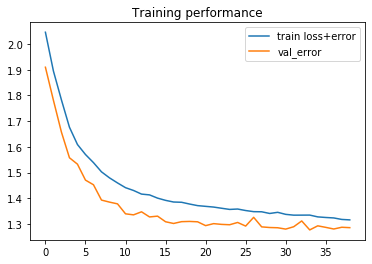

In [17]:
# Show loss curves 
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()